In [38]:
import pandas as pd
import numpy as np
import os
import re
import seaborn as sns

In [2]:
CSVFILE_DIR = "/media/dhruv2601/lisp/Research/Battery_Optimization/APKcollector/Results/ThunderOutput.csv"

In [22]:
df = pd.read_csv(CSVFILE_DIR, sep='\t', encoding='utf-8-sig')
regex = '([a-zA-Z0-9_-])'
# df = df.rename(columns=dict((col, ''.join(re.findall(regex, col))) for col in df.columns))
df

,serial,category,package,target_sdk,min_sdk,totalFS,totalBS,numSS,numSF,numSFS,totalService
0,0,ANDROID_WEAR,ch.publisheria.bring,27,16,0,18,8,0,2,18
1,1,ANDROID_WEAR,com.aa.android,26,21,5,25,27,5,4,30
2,2,ANDROID_WEAR,com.acmeaom.android.myradar,26,15,6,9,41,6,6,15
3,4,ANDROID_WEAR,com.adi.remote.phone,25,16,1,9,6,1,0,10
4,5,ANDROID_WEAR,com.aircanada,24,19,2,11,20,2,2,13
5,6,ANDROID_WEAR,com.amdroidalarmclock.amdroid,27,14,25,24,25,25,3,49
6,7,ANDROID_WEAR,com.android2.calculator3,25,14,26,-24,27,26,3,2
7,9,ANDROID_WEAR,com.balysv.loop,27,16,0,23,19,0,2,23
8,10,ANDROID_WEAR,com.baseapp.eyeem,26,15,2,12,25,2,4,14
9,11,ANDROID_WEAR,com.bitdefender.security,25,15,4,23,51,4,4,27


In [26]:
for i in range(1, 341):
    if(int(df['serial'].loc[341-i])-int(df['serial'].loc[341-i-1])==1):
        df['numSS'].loc[341-i] = int(df['numSS'].loc[341-i]) - int(df['numSS'].loc[341-i-1])
        df['numSF'].loc[341-i] = int(df['numSF'].loc[341-i]) - int(df['numSF'].loc[341-i-1])
        df['numSFS'].loc[341-i] = int(df['numSFS'].loc[341-i]) - int(df['numSFS'].loc[341-i-1])
        df['totalFS'].loc[341-i] = int(df['numSF'].loc[341-i])
        df['totalBS'].loc[341-i] = int(df['totalService'].loc[341-i]) - int(df['totalFS'].loc[341-i])

In [27]:
df

,serial,category,package,target_sdk,min_sdk,totalFS,totalBS,numSS,numSF,numSFS,totalService
0,0,ANDROID_WEAR,ch.publisheria.bring,27,16,0,18,8,0,2,18
1,1,ANDROID_WEAR,com.aa.android,26,21,5,25,19,5,2,30
2,2,ANDROID_WEAR,com.acmeaom.android.myradar,26,15,1,14,14,1,2,15
3,4,ANDROID_WEAR,com.adi.remote.phone,25,16,1,9,6,1,0,10
4,5,ANDROID_WEAR,com.aircanada,24,19,1,12,14,1,2,13
5,6,ANDROID_WEAR,com.amdroidalarmclock.amdroid,27,14,23,26,5,23,1,49
6,7,ANDROID_WEAR,com.android2.calculator3,25,14,1,1,2,1,0,2
7,9,ANDROID_WEAR,com.balysv.loop,27,16,0,23,19,0,2,23
8,10,ANDROID_WEAR,com.baseapp.eyeem,26,15,2,12,6,2,2,14
9,11,ANDROID_WEAR,com.bitdefender.security,25,15,2,25,26,2,0,27


In [28]:
df.to_csv(CSVFILE_DIR, sep='\t', encoding='utf-8')

In [37]:
fs = 0
bs = 0
for i in range(0, df.shape[0]-1):
    fs+=int(df['totalFS'].loc[i])
    bs+=int(df['totalBS'].loc[i])
print(fs)
print(bs)

305
2579


In [118]:
dfFS = pd.DataFrame(dtype='string', columns=['avgFS'])
dfFsMin = pd.DataFrame(dtype='string', columns=['avgFS'])

In [119]:
# -- for targetSDK vs foreground service

target = []
FS = []

for i in range(29):
    target.append(0)
    FS.append(0)

for i, row in df.iterrows():
    FS[row['target_sdk']] = FS[row['target_sdk']]+row['totalFS']
#     service[row[' min_sdk ']] = service[row[' min_sdk ']]+row[' #Services ']
# for i in range(0, len(FS)):
#     print(FS[i])


In [120]:
# -- for targetSDK vs foreground service

FSreal = []
ind=0
tempTotal = 0

for i in range(0, len(FS)):
    tempTotal= tempTotal + FS[i]

for i in range(0, tempTotal):
    FSreal.append(0)

for i in range(0, len(FS)):
    x = FS[i]
    for j in range(0, x):
        FSreal[ind] = i-1
        ind = ind+1

        
for i in range(0, len(FSreal)):
#     dfFS['targetSDK'].loc[i] = i 
#     dfFS['avgFS'].loc[i] = 0
    dfFS.loc[i] = [FSreal[i]]
# dfFS

In [96]:
# for i in range(0, df.shape[0]-1):
#     dfFS['avgFS'].loc[df['target_sdk']] = int(dfFS['avgFS'].loc[df['target_sdk']]) + int(df['totalFS'].loc[i])
# dfFS

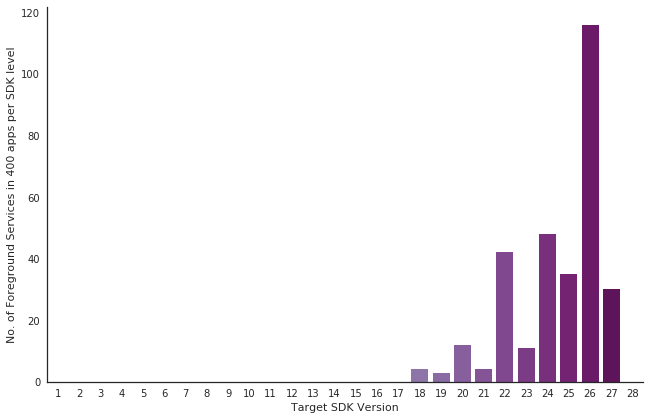

In [121]:
sns.set(style="white")

sdkLevel = np.arange(1,29)

g = sns.factorplot(x="avgFS", data = dfFS, kind = "count", palette="BuPu", size=6, aspect=1.5, order=sdkLevel)
g.set(xlabel='Target SDK Version', ylabel='No. of Foreground Services in 400 apps per SDK level')
g.set_xticklabels(step=1)
# g.set_yticklabels(step=1)

In [116]:
# -- for minSDK vs foreground service

target = []
FSmin = []

for i in range(29):
    target.append(0)
    FSmin.append(0)

for i, row in df.iterrows():
    FSmin[row['min_sdk']] = FSmin[row['min_sdk']]+row['totalFS']
#     service[row[' min_sdk ']] = service[row[' min_sdk ']]+row[' #Services ']
# for i in range(0, len(FS)):
#     print(FS[i])


In [126]:
# -- for minSDK vs foreground service

FSrealMin = []
ind=0
tempTotal = 0

for i in range(0, len(FSmin)):
    tempTotal= tempTotal + FSmin[i]

for i in range(0, tempTotal):
    FSrealMin.append(0)

for i in range(0, len(FSmin)):
    x = FSmin[i]
    for j in range(0, x):
        FSrealMin[ind] = i-1
        ind = ind+1

        
for i in range(0, len(FSrealMin)):
#     dfFS['targetSDK'].loc[i] = i 
#     dfFS['avgFS'].loc[i] = 0
    dfFsMin.loc[i] = [FSrealMin[i]]
# dfFsMin

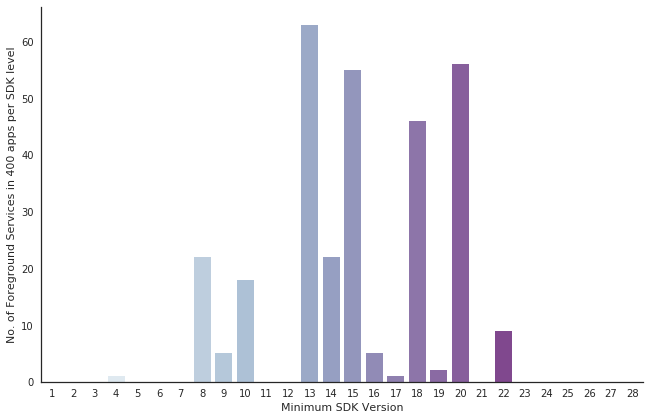

In [125]:
sns.set(style="white")

sdkLevel = np.arange(1,29)

g = sns.factorplot(x="avgFS", data = dfFsMin, kind = "count", palette="BuPu", size=6, aspect=1.5, order=sdkLevel)
g.set(xlabel='Minimum SDK Version', ylabel='No. of Foreground Services in 400 apps per SDK level')
g.set_xticklabels(step=1)
# g.set_yticklabels(step=1)

In [132]:
dfBS = pd.DataFrame(dtype='string', columns=['avgBS'])
dfBsMin = pd.DataFrame(dtype='string', columns=['avgBS'])

In [130]:
# -- for targetSDK vs background service

target = []
BS = []

for i in range(29):
    target.append(0)
    BS.append(0)

for i, row in df.iterrows():
    BS[row['target_sdk']] = BS[row['target_sdk']]+row['totalBS']
#     service[row[' min_sdk ']] = service[row[' min_sdk ']]+row[' #Services ']
# for i in range(0, len(FS)):
#     print(FS[i])


In [133]:
# -- for targetSDK vs background service

BSreal = []
ind=0
tempTotal = 0

for i in range(0, len(BS)):
    tempTotal= tempTotal + BS[i]

for i in range(0, tempTotal):
    BSreal.append(0)

for i in range(0, len(BS)):
    x = BS[i]
    for j in range(0, x):
        BSreal[ind] = i-1
        ind = ind+1

        
for i in range(0, len(BSreal)):
    dfBS.loc[i] = [BSreal[i]]

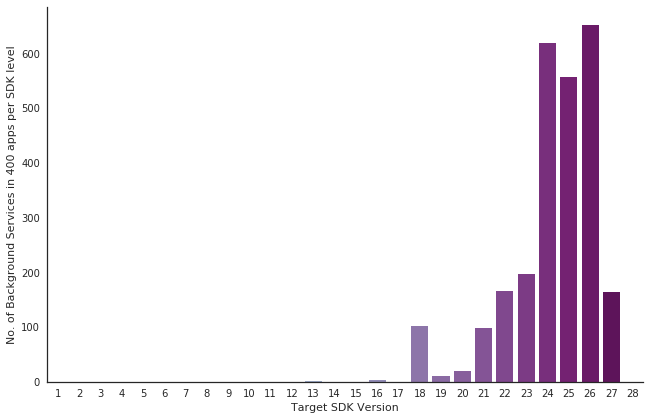

In [134]:
sns.set(style="white")

sdkLevel = np.arange(1,29)

g = sns.factorplot(x="avgBS", data = dfBS, kind = "count", palette="BuPu", size=6, aspect=1.5, order=sdkLevel)
g.set(xlabel='Target SDK Version', ylabel='No. of Background Services in 400 apps per SDK level')
g.set_xticklabels(step=1)
# g.set_yticklabels(step=1)